In [2]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("ahsan81/hotel-reservations-classification-dataset")

print("Path to dataset files:", path)
csv_file = os.path.join(path, 'Hotel Reservations.csv')
df = pd.read_csv(csv_file)
#Mapeo Booking_status
df['booking_status'] = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})
df.head()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 480k/480k [00:00<00:00, 2.07MB/s]

Extracting files...
Path to dataset files: C:\Users\samue\.cache\kagglehub\datasets\ahsan81\hotel-reservations-classification-dataset\versions\1


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


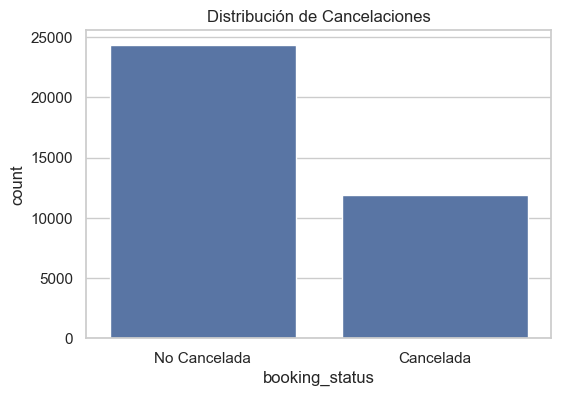

In [4]:
# Configuración visual
sns.set_theme(style="whitegrid")

# Distribución de la variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='booking_status', data=df)
plt.title('Distribución de Cancelaciones')
plt.xticks([0, 1], ['No Cancelada', 'Cancelada'])
plt.show()

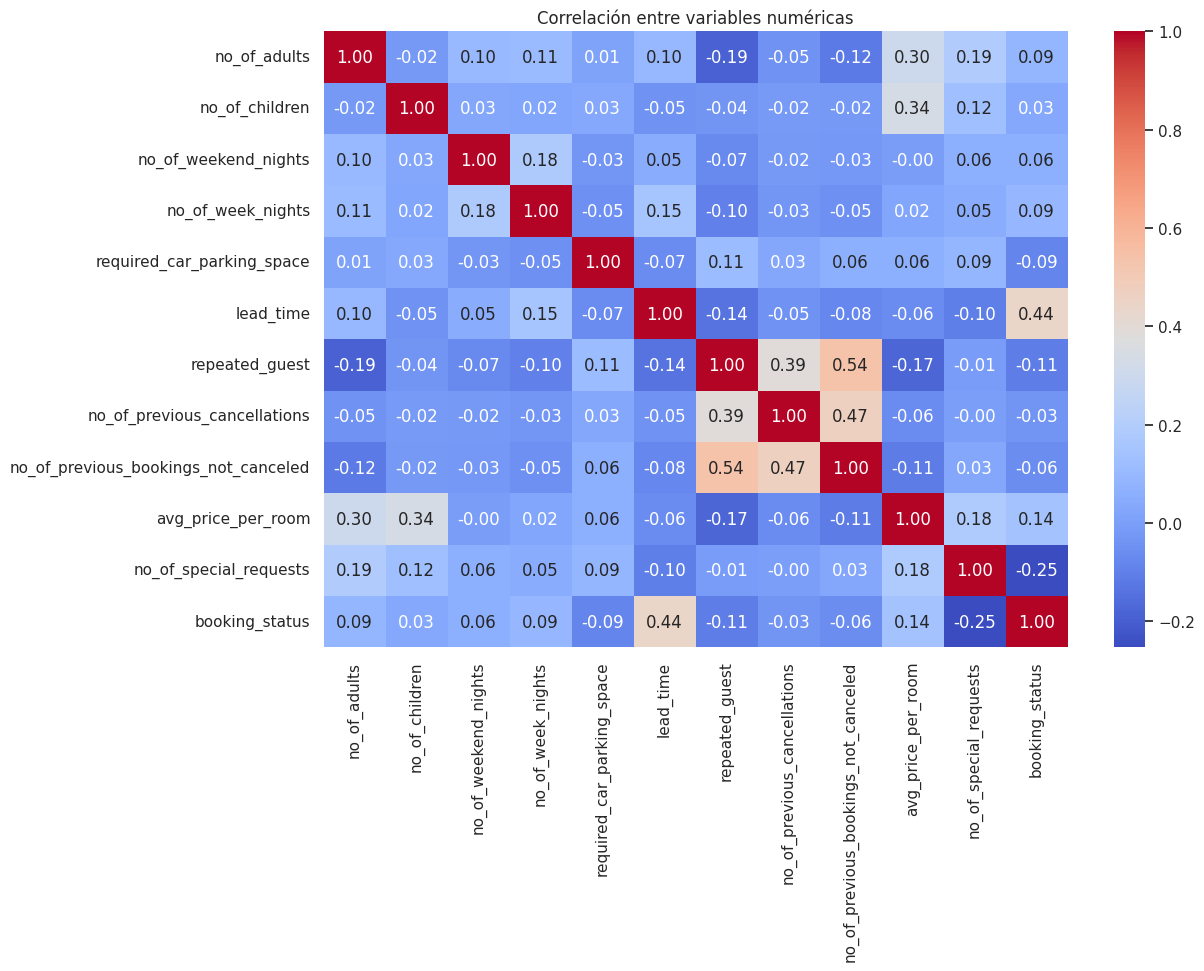

In [ ]:
# Correlación entre variables numéricas
numerical_vars = df.select_dtypes(include=['int64', 'float64']).drop(columns=['arrival_year', 'arrival_month', 'arrival_date'])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_vars.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlación entre variables numéricas')
plt.show()

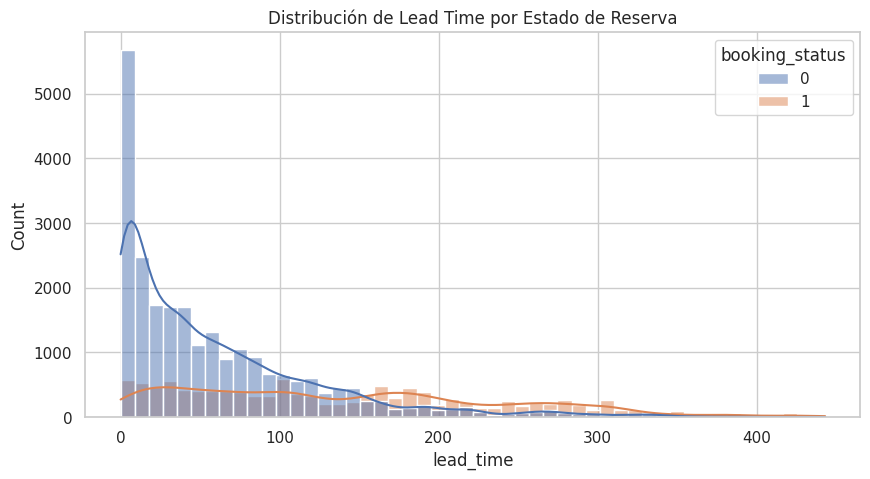

In [ ]:
# Distribución del lead time
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='lead_time', hue='booking_status', kde=True, bins=50)
plt.title('Distribución de Lead Time por Estado de Reserva')
plt.show()

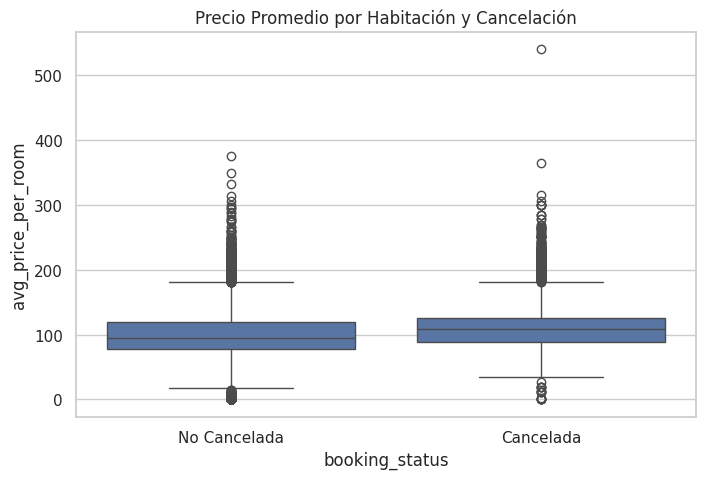

In [ ]:
# Precio por habitación
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='booking_status', y='avg_price_per_room')
plt.title('Precio Promedio por Habitación y Cancelación')
plt.xticks([0, 1], ['No Cancelada', 'Cancelada'])
plt.show()


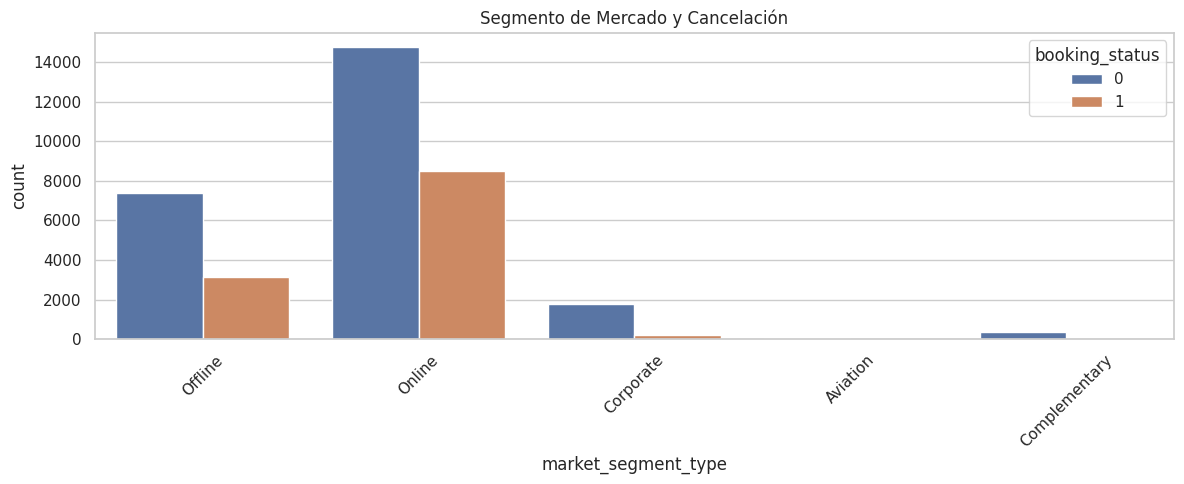

In [ ]:
# Segmento de mercado
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='market_segment_type', hue='booking_status')
plt.title('Segmento de Mercado y Cancelación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()